# Bank Customer Churn Prediction using ANN - Artificial Neural Network

In [72]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow
from keras.callbacks import EarlyStopping
from keras.regularizers import L1
from keras.layers import Dense, BatchNormalization, Dropout
from keras.models import Sequential
from sklearn.metrics import accuracy_score

In [73]:
df=pd.read_csv(r'C:\Users\Abubakar\OneDrive\Desktop\Excel Files\Bank Customer Churn.csv')
df

C:\Users\Abubakar\AppData\Local\Temp\ipykernel_5152\4078051838.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r'C:\Users\Abubakar\OneDrive\Desktop\Excel Files\Bank Customer Churn.csv')


,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Surname_tfidf_0,Surname_tfidf_1,Surname_tfidf_2,Surname_tfidf_3,Surname_tfidf_4,France,Germany,Spain,Female,Male,Mem__no__Products,Cred_Bal_Sal,Bal_sal,Tenure_Age,Age_Tenure_product
0,2023,668.0,33.0,3.0,0.00,2.0,1,0,181449.97,0,"-3.124.436.679,76","-460.594.640,32","13.351.443.755,82","-6.116.396.019,04","6.694.577.725,07",1,0,0,0,1,0.0,0.0,0.0,"9.090.909.090.909.090,00",99.0
1,2024,627.0,33.0,1.0,0.00,2.0,1,1,49503.5,0,"481.338.256,69","838.931.547,32","-11.828.148.560,09","7.812.514.313,22","1.663.329.080,86",1,0,0,0,1,2.0,0.0,0.0,"30.303.030.303.030.300,00",33.0
2,1236,678.0,40.0,10.0,0.00,2.0,1,0,184866.69,0,"-3.447.294.172.650.730,00","-2.025.033.659.055.650,00","-10.280.719.705.962.700,00","-938.715.514.665.035,00","15.068.643.143.363.400,00",1,0,0,0,1,0.0,0.0,0.0,0.25,400.0
3,1362,581.0,34.0,2.0,148882.54,1.0,1,1,84560.88,0,"-72.209.360.028,78","-10.461.631.817.033.800,00","131.291.330.459.128,00","846.300.277.850.006,00","16.075.843.065.996.200,00",1,0,0,0,1,1.0,"10.229.405.812.711.500,00","17.606.550.452.171.200,00","58.823.529.411.764.700,00",68.0
4,491,716.0,33.0,5.0,0.00,2.0,1,1,15068.83,0,"-1.037.134.935,85","-545.133.813,64","498.455.946,81","-1.568.877.112,96","18.489.187.336,37",0,0,1,0,1,2.0,0.0,0.0,"15.151.515.151.515.100,00",165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175023,2226,644.0,28.0,7.0,155060.41,1.0,1,0,29179.52,0,"-4.763,76","114.119,45","1.165.557,26","-1.177.944,59","-4.259.289,45",1,0,0,0,1,0.0,"34.222.257.268.111.300,00","5.314.015.103.743.990,00",0.25,196.0
175024,2846,800.0,29.0,2.0,0.00,2.0,0,0,167773.55,0,"-15.103,70","68.546,18","46.744,02","-583.449,86","-419.871,58",1,0,0,1,0,0.0,0.0,0.0,"6.896.551.724.137.930,00",58.0
175025,1999,771.0,39.0,5.0,0.00,2.0,1,0,96270.64,0,"-15.103,70","68.546,18","46.744,02","-583.449,86","-419.871,58",1,0,0,0,1,0.0,0.0,0.0,"1.282.051.282.051.280,00",195.0
175026,1336,516.0,35.0,10.0,57369.61,1.0,1,1,101699.77,0,"83.065.226.551,40","9.769.052.344.005.960,00","16.065.539.886.799,00","-7.042.490.682.870.180,00","18.834.370.862.998,00",1,0,0,0,1,1.0,"29.107.950.548.954.000,00","5.641.075.687.781.790,00","2.857.142.857.142.850,00",350.0


In [74]:
df.isnull().sum()

Surname               0
CreditScore           0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Surname_tfidf_0       0
Surname_tfidf_1       0
Surname_tfidf_2       0
Surname_tfidf_3       0
Surname_tfidf_4       0
France                0
Germany               0
Spain                 0
Female                0
Male                  0
Mem__no__Products     0
Cred_Bal_Sal          0
Bal_sal               0
Tenure_Age            0
Age_Tenure_product    0
dtype: int64

In [75]:
df.duplicated().sum()

41

In [76]:
df.drop_duplicates(keep='first',inplace=True)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174987 entries, 0 to 175027
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Surname             174987 non-null  int64  
 1   CreditScore         174987 non-null  float64
 2   Age                 174987 non-null  float64
 3   Tenure              174987 non-null  float64
 4   Balance             174987 non-null  float64
 5   NumOfProducts       174987 non-null  float64
 6   HasCrCard           174987 non-null  int64  
 7   IsActiveMember      174987 non-null  int64  
 8   EstimatedSalary     174987 non-null  object 
 9   Exited              174987 non-null  int64  
 10  Surname_tfidf_0     174987 non-null  object 
 11  Surname_tfidf_1     174987 non-null  object 
 12  Surname_tfidf_2     174987 non-null  object 
 13  Surname_tfidf_3     174987 non-null  object 
 14  Surname_tfidf_4     174987 non-null  object 
 15  France              174987 non-null  in

In [78]:
df['EstimatedSalary'] = pd.to_numeric(df['EstimatedSalary'], errors='coerce')
df['Surname_tfidf_0'] = pd.to_numeric(df['EstimatedSalary'], errors='coerce')
df['Surname_tfidf_1'] = pd.to_numeric(df['EstimatedSalary'], errors='coerce')
df['Surname_tfidf_2'] = pd.to_numeric(df['EstimatedSalary'], errors='coerce')
df['Surname_tfidf_3'] = pd.to_numeric(df['EstimatedSalary'], errors='coerce')
df['Surname_tfidf_4'] = pd.to_numeric(df['EstimatedSalary'], errors='coerce')
df['Cred_Bal_Sal'] = pd.to_numeric(df['EstimatedSalary'], errors='coerce')
df['Bal_sal'] = pd.to_numeric(df['EstimatedSalary'], errors='coerce')
df['Tenure_Age'] = pd.to_numeric(df['EstimatedSalary'], errors='coerce')


df = df.dropna(subset=['EstimatedSalary'])
df = df.dropna(subset=['Surname_tfidf_0'])
df = df.dropna(subset=['Surname_tfidf_1'])
df = df.dropna(subset=['Surname_tfidf_2'])
df = df.dropna(subset=['Surname_tfidf_3'])
df = df.dropna(subset=['Surname_tfidf_4'])
df = df.dropna(subset=['Cred_Bal_Sal'])
df = df.dropna(subset=['Bal_sal'])
df = df.dropna(subset=['Tenure_Age'])

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174985 entries, 0 to 175027
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Surname             174985 non-null  int64  
 1   CreditScore         174985 non-null  float64
 2   Age                 174985 non-null  float64
 3   Tenure              174985 non-null  float64
 4   Balance             174985 non-null  float64
 5   NumOfProducts       174985 non-null  float64
 6   HasCrCard           174985 non-null  int64  
 7   IsActiveMember      174985 non-null  int64  
 8   EstimatedSalary     174985 non-null  float64
 9   Exited              174985 non-null  int64  
 10  Surname_tfidf_0     174985 non-null  float64
 11  Surname_tfidf_1     174985 non-null  float64
 12  Surname_tfidf_2     174985 non-null  float64
 13  Surname_tfidf_3     174985 non-null  float64
 14  Surname_tfidf_4     174985 non-null  float64
 15  France              174985 non-null  in

In [80]:
df.describe()

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Surname_tfidf_0,Surname_tfidf_1,Surname_tfidf_2,Surname_tfidf_3,Surname_tfidf_4,France,Germany,Spain,Female,Male,Mem__no__Products,Cred_Bal_Sal,Bal_sal,Tenure_Age,Age_Tenure_product
count,174985.000000,174985.000000,174985.000000,174985.000000,174985.000000,174985.000000,174985.000000,174985.00000,174985.000000,174985.000000,174985.000000,174985.000000,174985.000000,174985.000000,174985.000000,174985.000000,174985.000000,174985.000000,174985.000000,174985.000000,174985.000000,174985.000000,174985.000000,174985.000000,174985.000000
mean,1617.503757,656.115993,38.171682,5.020053,56680.602714,1.553042,0.751202,0.49874,111862.248778,0.211178,111862.248778,111862.248778,111862.248778,111862.248778,111862.248778,0.566889,0.212081,0.221030,0.436660,0.563340,0.784947,111862.248778,111862.248778,111862.248778,191.352106
std,813.842289,81.144620,8.969392,2.811169,62983.836179,0.549216,0.432318,0.50000,50814.517087,0.408146,50814.517087,50814.517087,50814.517087,50814.517087,50814.517087,0.495507,0.408783,0.414942,0.495973,0.495973,0.871578,50814.517087,50814.517087,50814.517087,118.747378
min,0.000000,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.00000,11.580000,0.000000,11.580000,11.580000,11.580000,11.580000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.580000,11.580000,11.580000,0.000000
25%,949.000000,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.00000,73181.390000,0.000000,73181.390000,73181.390000,73181.390000,73181.390000,73181.390000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73181.390000,73181.390000,73181.390000,93.000000
50%,1666.000000,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.00000,116969.730000,0.000000,116969.730000,116969.730000,116969.730000,116969.730000,116969.730000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,116969.730000,116969.730000,116969.730000,182.000000
75%,2292.000000,710.000000,42.000000,7.000000,120731.080000,2.000000,1.000000,1.00000,154767.340000,0.000000,154767.340000,154767.340000,154767.340000,154767.340000,154767.340000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,154767.340000,154767.340000,154767.340000,272.000000
max,2931.000000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.00000,199992.480000,1.000000,199992.480000,199992.480000,199992.480000,199992.480000,199992.480000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,199992.480000,199992.480000,199992.480000,880.000000


In [81]:
x = df.iloc[:, :9].join(df.iloc[:, 10:])
y=df.iloc[:,9]

In [82]:
x

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Surname_tfidf_0,Surname_tfidf_1,Surname_tfidf_2,Surname_tfidf_3,Surname_tfidf_4,France,Germany,Spain,Female,Male,Mem__no__Products,Cred_Bal_Sal,Bal_sal,Tenure_Age,Age_Tenure_product
0,2023,668.0,33.0,3.0,0.00,2.0,1,0,181449.97,181449.97,181449.97,181449.97,181449.97,181449.97,1,0,0,0,1,0.0,181449.97,181449.97,181449.97,99.0
1,2024,627.0,33.0,1.0,0.00,2.0,1,1,49503.50,49503.50,49503.50,49503.50,49503.50,49503.50,1,0,0,0,1,2.0,49503.50,49503.50,49503.50,33.0
2,1236,678.0,40.0,10.0,0.00,2.0,1,0,184866.69,184866.69,184866.69,184866.69,184866.69,184866.69,1,0,0,0,1,0.0,184866.69,184866.69,184866.69,400.0
3,1362,581.0,34.0,2.0,148882.54,1.0,1,1,84560.88,84560.88,84560.88,84560.88,84560.88,84560.88,1,0,0,0,1,1.0,84560.88,84560.88,84560.88,68.0
4,491,716.0,33.0,5.0,0.00,2.0,1,1,15068.83,15068.83,15068.83,15068.83,15068.83,15068.83,0,0,1,0,1,2.0,15068.83,15068.83,15068.83,165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175023,2226,644.0,28.0,7.0,155060.41,1.0,1,0,29179.52,29179.52,29179.52,29179.52,29179.52,29179.52,1,0,0,0,1,0.0,29179.52,29179.52,29179.52,196.0
175024,2846,800.0,29.0,2.0,0.00,2.0,0,0,167773.55,167773.55,167773.55,167773.55,167773.55,167773.55,1,0,0,1,0,0.0,167773.55,167773.55,167773.55,58.0
175025,1999,771.0,39.0,5.0,0.00,2.0,1,0,96270.64,96270.64,96270.64,96270.64,96270.64,96270.64,1,0,0,0,1,0.0,96270.64,96270.64,96270.64,195.0
175026,1336,516.0,35.0,10.0,57369.61,1.0,1,1,101699.77,101699.77,101699.77,101699.77,101699.77,101699.77,1,0,0,0,1,1.0,101699.77,101699.77,101699.77,350.0


In [83]:
y

0         0
1         0
2         0
3         0
4         0
         ..
175023    0
175024    0
175025    0
175026    0
175027    1
Name: Exited, Length: 174985, dtype: int64

In [84]:
y.unique()

array([0, 1], dtype=int64)

In [85]:
ss=StandardScaler()

x=pd.DataFrame(ss.fit_transform(x))

In [86]:
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,0.498251,0.146455,-0.576594,-0.718583,-0.899926,0.813813,0.575500,-0.997483,1.369450,1.369450,1.369450,1.369450,1.369450,1.369450,0.874080,-0.518812,-0.532679,-0.880413,0.880413,-0.900607,1.369450,1.369450,1.369450,-0.777721
1,0.499479,-0.358817,-0.576594,-1.430033,-0.899926,0.813813,0.575500,1.002523,-1.227187,-1.227187,-1.227187,-1.227187,-1.227187,-1.227187,0.874080,-0.518812,-0.532679,-0.880413,0.880413,1.394087,-1.227187,-1.227187,-1.227187,-1.333525
2,-0.468770,0.269692,0.203840,1.771491,-0.899926,0.813813,0.575500,-0.997483,1.436689,1.436689,1.436689,1.436689,1.436689,1.436689,0.874080,-0.518812,-0.532679,-0.880413,0.880413,-0.900607,1.436689,1.436689,1.436689,1.757079
3,-0.313948,-0.925708,-0.465103,-1.074308,1.463903,-1.006968,0.575500,1.002523,-0.537277,-0.537277,-0.537277,-0.537277,-0.537277,-0.537277,0.874080,-0.518812,-0.532679,-0.880413,0.880413,0.246740,-0.537277,-0.537277,-0.537277,-1.038780
4,-1.384183,0.737993,-0.576594,-0.007133,-0.899926,0.813813,0.575500,1.002523,-1.904843,-1.904843,-1.904843,-1.904843,-1.904843,-1.904843,-1.144061,-0.518812,1.877303,-0.880413,0.880413,1.394087,-1.904843,-1.904843,-1.904843,-0.221918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174980,0.747685,-0.149314,-1.134047,0.704317,1.561989,-1.006968,0.575500,-0.997483,-1.627152,-1.627152,-1.627152,-1.627152,-1.627152,-1.627152,0.874080,-0.518812,-0.532679,-0.880413,0.880413,-0.900607,-1.627152,-1.627152,-1.627152,0.039141
174981,1.509506,1.773185,-1.022556,-1.074308,-0.899926,0.813813,-1.737618,-0.997483,1.100305,1.100305,1.100305,1.100305,1.100305,1.100305,0.874080,-0.518812,-0.532679,1.135830,-1.135830,-0.900607,1.100305,1.100305,1.100305,-1.122993
174982,0.468761,1.415797,0.092350,-0.007133,-0.899926,0.813813,0.575500,-0.997483,-0.306835,-0.306835,-0.306835,-0.306835,-0.306835,-0.306835,0.874080,-0.518812,-0.532679,-0.880413,0.880413,-0.900607,-0.306835,-0.306835,-0.306835,0.030720
174983,-0.345896,-1.726749,-0.353613,1.771491,0.010939,-1.006968,0.575500,1.002523,-0.199992,-0.199992,-0.199992,-0.199992,-0.199992,-0.199992,0.874080,-0.518812,-0.532679,-0.880413,0.880413,0.246740,-0.199992,-0.199992,-0.199992,1.336016


In [87]:
x.shape

(174985, 24)

In [88]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [89]:
ann=Sequential()

ann.add(Dense(23, input_dim=24, activation='relu'))
ann.add(BatchNormalization())

ann.add(Dense(20, activation='relu'))
ann.add(BatchNormalization())

ann.add(Dense(18, activation='relu'))
ann.add(BatchNormalization())

ann.add(Dense(16, activation='relu'))
ann.add(BatchNormalization())

ann.add(Dense(14, activation='relu'))
ann.add(BatchNormalization())


ann.add(Dense(12, activation='relu'))
ann.add(BatchNormalization())

ann.add(Dense(10, activation='relu'))
ann.add(BatchNormalization())

ann.add(Dense(8, activation='relu'))
ann.add(BatchNormalization())

ann.add(Dense(6, activation='relu'))
ann.add(BatchNormalization())

ann.add(Dense(4, activation='relu'))
ann.add(BatchNormalization())

ann.add(Dense(2, activation='relu'))
ann.add(BatchNormalization())

ann.add(Dense(1, activation='sigmoid')) #sigmoid because output is in binary format

In [90]:
ann.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [91]:
ann.fit(x_train,y_train,batch_size=100,epochs=10, validation_data=(x_test,y_test), callbacks=EarlyStopping())

Epoch 1/10
1400/1400 [==============================] - 17s 7ms/step - loss: 0.4788 - accuracy: 0.7600 - val_loss: 0.3898 - val_accuracy: 0.8382
Epoch 2/10
1400/1400 [==============================] - 9s 6ms/step - loss: 0.3767 - accuracy: 0.8386 - val_loss: 0.3464 - val_accuracy: 0.8522
Epoch 3/10
1400/1400 [==============================] - 9s 6ms/step - loss: 0.3490 - accuracy: 0.8516 - val_loss: 0.3371 - val_accuracy: 0.8575
Epoch 4/10
1400/1400 [==============================] - 9s 6ms/step - loss: 0.3403 - accuracy: 0.8568 - val_loss: 0.3306 - val_accuracy: 0.8621
Epoch 5/10
1400/1400 [==============================] - 9s 6ms/step - loss: 0.3361 - accuracy: 0.8591 - val_loss: 0.3281 - val_accuracy: 0.8628
Epoch 6/10
1400/1400 [==============================] - 9s 6ms/step - loss: 0.3351 - accuracy: 0.8590 - val_loss: 0.3280 - val_accuracy: 0.8638
Epoch 7/10
1400/1400 [==============================] - 9s 6ms/step - loss: 0.3331 - accuracy: 0.8605 - val_loss: 0.3263 - val_accuracy

In [92]:
train_accuracy=ann.history.history['accuracy']
test_accuracy=ann.history.history['val_accuracy']

In [93]:
len(test_accuracy)

8

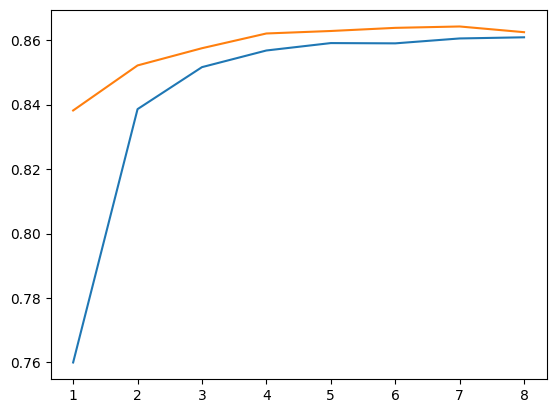

In [95]:
plt.plot([i for i in range(1,9)], train_accuracy)
plt.plot([i for i in range(1,9)], test_accuracy)
plt.show()

In [96]:
prd=ann.predict([[x_test]])

1094/1094 [==============================] - 3s 2ms/step


In [97]:
prd_data=[]

for i in prd:
    if i[0]>0.5:
        prd_data.append(1)
    else:
        prd_data.append(0)
        
prd_data

[0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,


In [98]:
prd1=ann.predict(x_train)

4375/4375 [==============================] - 11s 2ms/step


In [99]:
prd_data1=[]

for i in prd1:
    if i[0]>0.5:
        prd_data1.append(1)
    else:
        prd_data1.append(0)
    
# prd_data1

In [100]:
accuracy_score(y_train,prd_data1) ,accuracy_score(y_test,prd_data)

(0.8635740206303397, 0.8624739263365432)

### Checking Values

In [101]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [102]:
x_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
57629,-0.896372,0.035542,-0.130632,0.704317,-0.899926,0.813813,0.575500,1.002523,0.809413,0.809413,0.809413,0.809413,0.809413,0.809413,0.874080,-0.518812,-0.532679,-0.880413,0.880413,1.394087,0.809413,0.809413,0.809413,0.569681
124386,-1.822845,0.134131,-0.353613,1.060041,1.931247,-1.006968,0.575500,-0.997483,1.683901,1.683901,1.683901,1.683901,1.683901,1.683901,-1.144061,1.927480,-0.532679,-0.880413,0.880413,-0.900607,1.683901,1.683901,1.683901,0.746527
91416,0.600236,-0.605291,-0.911066,-1.430033,0.819711,-1.006968,-1.737618,1.002523,0.504742,0.504742,0.504742,0.504742,0.504742,0.504742,0.874080,-0.518812,-0.532679,1.135830,-1.135830,0.246740,0.504742,0.504742,0.504742,-1.358788
70315,-0.940607,-0.605291,-0.019141,1.060041,1.084001,0.813813,0.575500,-0.997483,-1.190942,-1.190942,-1.190942,-1.190942,-1.190942,-1.190942,-1.144061,1.927480,-0.532679,-0.880413,0.880413,-0.900607,-1.190942,-1.190942,-1.190942,0.948638
35154,-1.323975,-1.196829,0.984274,1.771491,0.779406,-1.006968,0.575500,1.002523,-0.399232,-0.399232,-0.399232,-0.399232,-0.399232,-0.399232,0.874080,-0.518812,-0.532679,1.135830,-1.135830,0.246740,-0.399232,-0.399232,-0.399232,2.346567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66701,0.578119,0.380606,-0.465103,0.704317,-0.899926,0.813813,0.575500,-0.997483,-0.990346,-0.990346,-0.990346,-0.990346,-0.990346,-0.990346,0.874080,-0.518812,-0.532679,1.135830,-1.135830,-0.900607,-0.990346,-0.990346,-0.990346,0.392834
114071,-0.473685,-1.295419,1.987690,1.415766,1.413845,-1.006968,0.575500,-0.997483,-0.888127,-0.888127,-0.888127,-0.888127,-0.888127,-0.888127,-1.144061,1.927480,-0.532679,-0.880413,0.880413,-0.900607,-0.888127,-0.888127,-0.888127,2.632890
161167,1.392775,-0.888737,-0.799575,-1.074308,-0.899926,0.813813,0.575500,-0.997483,1.104466,1.104466,1.104466,1.104466,1.104466,1.104466,0.874080,-0.518812,-0.532679,1.135830,-1.135830,-0.900607,1.104466,1.104466,1.104466,-1.089308
90789,1.051185,-1.159858,-0.019141,1.771491,-0.899926,0.813813,0.575500,1.002523,-1.062679,-1.062679,-1.062679,-1.062679,-1.062679,-1.062679,0.874080,-0.518812,-0.532679,1.135830,-1.135830,1.394087,-1.062679,-1.062679,-1.062679,1.588653


In [103]:
y_test

57635     0
124404    0
91427     0
70323     0
35158     0
         ..
66709     0
114086    0
161197    0
90800     0
70814     1
Name: Exited, Length: 34997, dtype: int64

In [104]:
prd2=ann.predict([[0.157889, 1.403474, 0.984274, -1.074308, 1.144419, -1.006968, 0.575500, 1.002523, 0.801063, 0.801063, 
                   0.801063, 0.801063, 0.801063, 0.801063, -1.144061, 1.927480, -0.532679, 1.135830, -1.135830, 0.246740, 
                   0.801063, 0.801063, 0.801063, -0.819828]])

prd_data2=[]

for i in prd2:
    if i[0]>0.5:
        prd_data2.append(1)
        print('✅ Likely to Churn')
    else:
        prd_data2.append(0)
        print('❌ Not Likely to Churn')
        
prd_data2

1/1 [==============================] - 0s 462ms/step
✅ Likely to Churn


[1]